# Aplicações de Aprendizado de Máquina e Processamento de Linguagem Natural

## Exercício 01 - Regressão

### Gustavo Sarti
### RA: 191512

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split



### Importando o Dataset

In [21]:
port = pd.read_csv("https://raw.githubusercontent.com/brvnl/MultivariateLinearRegression/master/student/student-por.csv", sep=";")
# port = pd.read_csv("student-por.csv", sep=";")

# mat = pd.read_csv("student-mat.csv", sep=";")

### Descrição dos dados

In [22]:
display(port.head(3))
# display(mat.head(3))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [7]:
# Conferindo se faltam dados

port.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [5]:
# Descrevendo as respostas únicas para cada uma das variáveis

for c in port.columns:
    c_domains = port[c].unique()
        
    if len(c_domains) > 30:
        print("%s: %d distinct" %(c, len(c_domains)))
    else:
        print("%s: %s" %(c, c_domains))

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 1 2]
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
G1: [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
G2: [11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
G3: [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]


In [6]:
# Descrevendo os tipos de cada uma das variáveis 
# Aplicando estatística descritiva sobre as variáveis numéricas

display(port.dtypes)
display(port.describe())

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


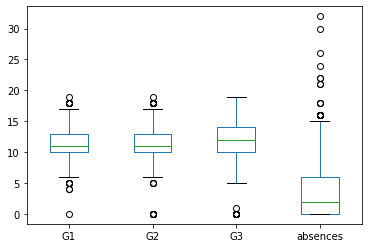

In [35]:
notes_abs = port[['G1','G2','G3','absences']]
notes_abs.plot.box()

In [40]:
# Tabela de frequência para relação entre variáveis categóricas

display(pd.crosstab(port.internet, port.famsup))
display(pd.crosstab(port.famsup, port.Mjob))

famsup,no,yes
internet,,
no,68,83
yes,183,315


Mjob,at_home,health,other,services,teacher
famsup,,,,,
no,54,15,114,43,25
yes,81,33,144,93,47


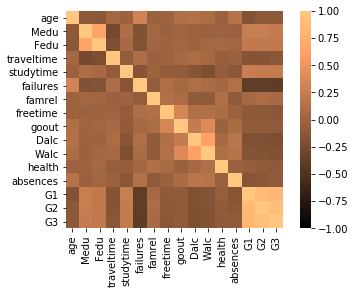

In [4]:
# Heatmap para averiguar a correlação entre as variáveis numéricas

ax = sns.heatmap(
    port.corr(),
    vmin = -1, vmax = 1, center = 0,
    cmap = 'copper',
    square = True
)

In [16]:
# Averiguando o scrore da regressão linear entre as notas nas avaliações e as variáveis com correlação mais forte com elas

g1 = port['G1'].values.reshape(-1,1)
g2 = port['G2'].values.reshape(-1,1)
g3 = port['G3'].values.reshape(-1,1)

y1 = port['studytime'].values.reshape(-1,1)
y2 = port['freetime'].values.reshape(-1,1)
y3 = port['failures'].values.reshape(-1,1)
y4 = port['health'].values.reshape(-1,1)
y5 = port['absences'].values.reshape(-1,1)
y6 = port['traveltime'].values.reshape(-1,1)

ys = [y1, y2, y3, y4, y5, y6]

print("O score com G1 é:\n")
for y in ys:
    reg =LinearRegression().fit(g1,y)
    print(reg.score(g1,y))

print("\nO score com G2 é:\n")
for y in ys:
    reg =LinearRegression().fit(g2,y)
    print(reg.score(g2,y))

print("\nO score com G3 é:\n")
for y in ys:
    reg =LinearRegression().fit(g3,y)
    print(reg.score(g3,y))

O score com G1 é:

0.06805596405355152
0.008929608523180255
0.1476176898715419
0.0026674554837070596
0.021652899351715438
0.02375285761195778

O score com G2 é:

0.0578392875614796
0.011380180005018392
0.1488279175892182
0.006753401785541735
0.015561298426790882
0.023866811135752952

O score com G3 é:

0.06239438965134814
0.015056498823853293
0.1546971203315729
0.009771567925197733
0.008350131955637274
0.016172963474138213


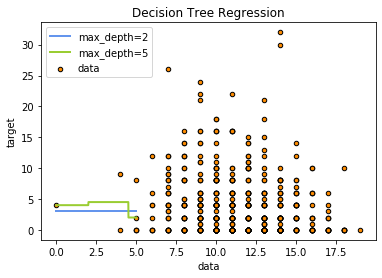

In [24]:
# Tentativa de usar uma Decision Tree Regression para ver se surge alum resultado interessante 
# Não parece trazer nenhum resultado interessante como foi aplicada

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(g1, y5)
regr_2.fit(g1, y5)

g1_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y5_1 = regr_1.predict(g1_test)
y5_2 = regr_2.predict(g1_test)

# Plot the results
plt.figure()
plt.scatter(g1, y5, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(g1_test, y5_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(g1_test, y5_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("notas - G1")
plt.ylabel("Nº de faltas")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()